# Importing Basic Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import DBSCAN
%matplotlib inline
df = pd.read_json('livedata.json')
df

,id,timestamp,latitude,longitude
0,David,2020-07-03 18:59:35,13.103154,77.525898
1,David,2020-07-04 06:31:00,13.198150,77.684777
2,David,2020-07-04 16:05:43,13.217815,77.504710
3,David,2020-07-04 10:47:18,13.279344,77.590116
4,David,2020-07-03 21:12:58,13.123251,77.596149
...,...,...,...,...
485,Heidi,2020-07-03 22:37:50,13.275803,77.691196
486,Heidi,2020-07-03 23:44:29,13.219267,77.524195
487,Heidi,2020-07-04 11:46:18,13.299514,77.534060
488,Heidi,2020-07-03 18:34:45,13.079772,77.688496


In [22]:
df.to_csv('livedata.csv')

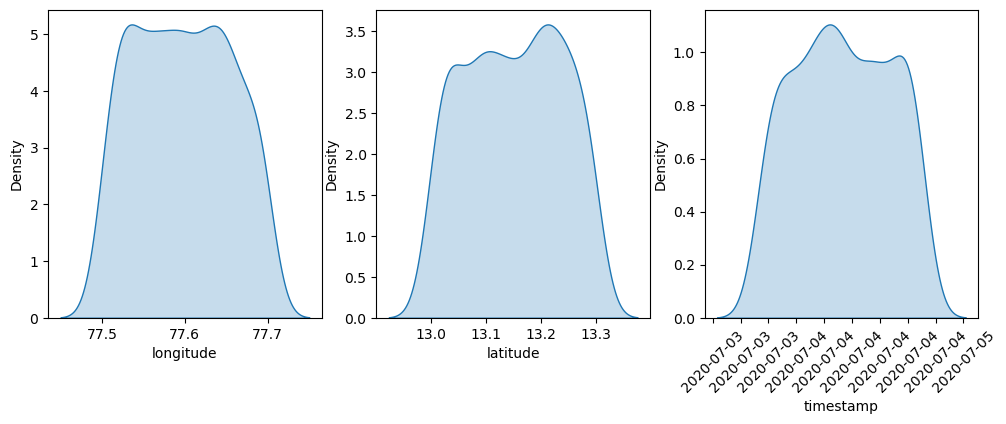

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.kdeplot(df["longitude"], fill=True, ax=axes[0])
sns.kdeplot(df["latitude"], fill=True, ax=axes[1])
sns.kdeplot(df["timestamp"], fill=True, ax=axes[2])
axes[2].set_xticks(axes[2].get_xticks())
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
plt.show()

# Plotting ScatterPlot

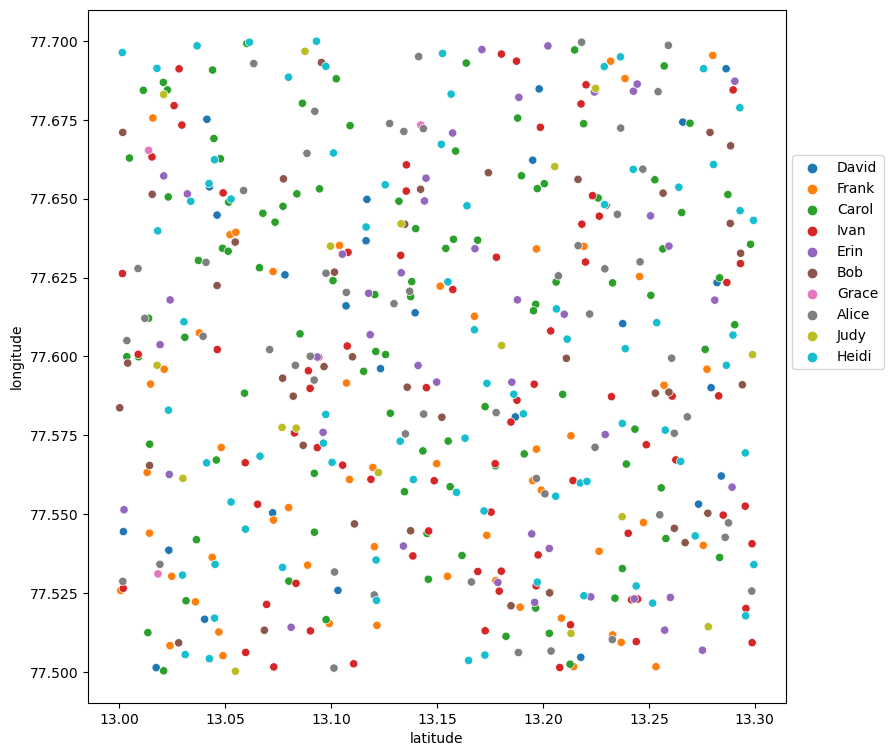

In [24]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

# DBSCAN Model Clustering

In [25]:
model = DBSCAN(eps=0.0018288, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

In [26]:
df

,id,timestamp,latitude,longitude,cluster
0,David,2020-07-03 18:59:35,13.103154,77.525898,-1
1,David,2020-07-04 06:31:00,13.198150,77.684777,-1
2,David,2020-07-04 16:05:43,13.217815,77.504710,-1
3,David,2020-07-04 10:47:18,13.279344,77.590116,-1
4,David,2020-07-03 21:12:58,13.123251,77.596149,-1
...,...,...,...,...,...
485,Heidi,2020-07-03 22:37:50,13.275803,77.691196,-1
486,Heidi,2020-07-03 23:44:29,13.219267,77.524195,-1
487,Heidi,2020-07-04 11:46:18,13.299514,77.534060,-1
488,Heidi,2020-07-03 18:34:45,13.079772,77.688496,-1


# Exporting to CSV

In [27]:
df.to_csv('clustered.csv', index=False)

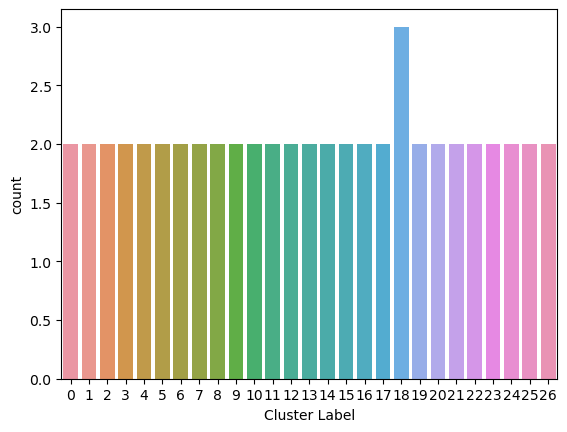

In [28]:
a=model.labels_
sns.countplot(x=a[a!=-1])
plt.xlabel('Cluster Label')
plt.show()

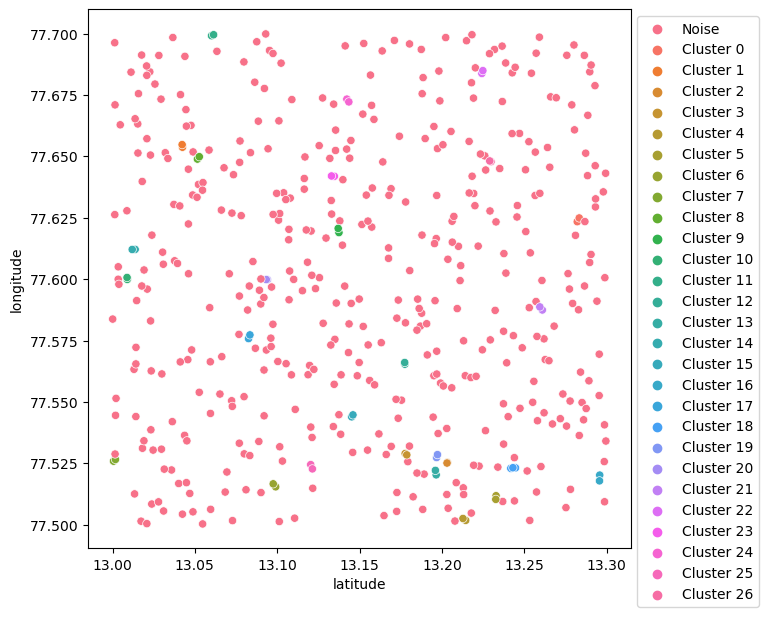

In [29]:
fig = plt.figure(figsize=(7,7))
sns.scatterplot(x=df['latitude'],y=df['longitude'],data=df, hue = ['Cluster {}'.format(x) if x != -1 else "Noise" for x in model.labels_])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [30]:
def get_infected_names(input_name):
    infected_names = []
    for cluster in set(df.loc[df['id'] == input_name, 'cluster']):
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            infected_names.extend(ids_in_cluster[(ids_in_cluster != input_name) & (~ids_in_cluster.isin(infected_names))])
    return infected_names

In [31]:
get_infected_names("Bob")

['Frank', 'Ivan', 'Judy']